In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import upfirdn
import common
import random

In [5]:
beta = 0.25
# Number of symbol
span = 6.0
# Number of sample per symobl
sps  = 4.0
# Calculate SRRC filter
h = common.rcosdesign(beta, span, sps, 'normal')

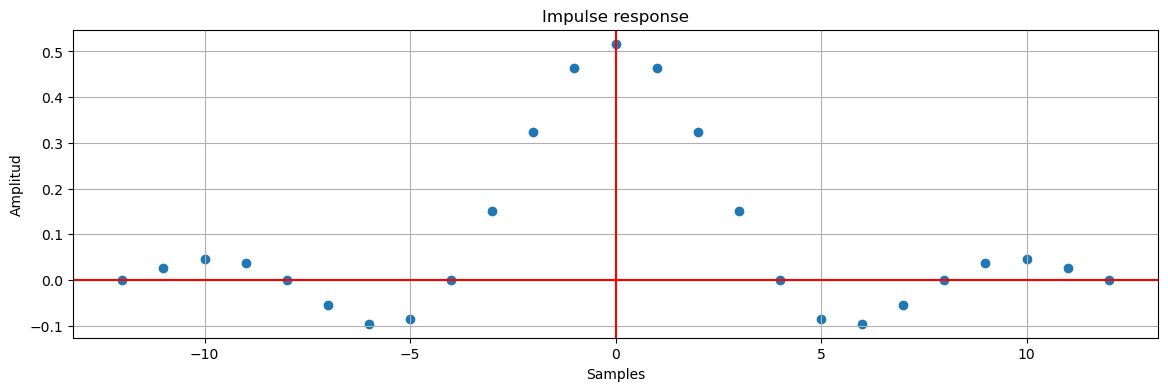

In [6]:
# Plot the SRRCfilter coeficients
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
x_midrange = (span * sps) / 2 
x_range = (span * sps) + 1.0
x = np.linspace(-x_midrange, x_midrange, int(x_range))
plt.scatter(x,h)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # x = 0
plt.show()

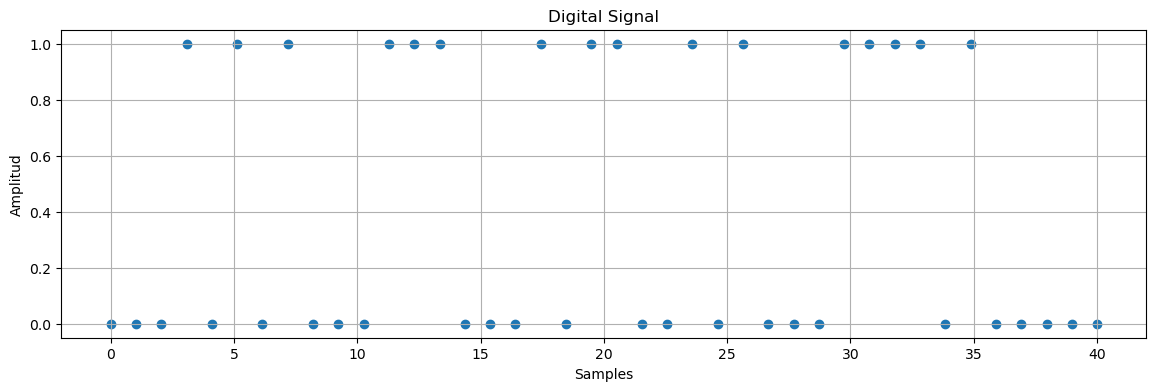

In [133]:
# Binary sequence generaion
num_d = 40
data_bin_tx = np.random.randint(2, size=num_d).tolist()

# Plot binary secuence
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Digital Signal')
x = np.linspace(0, num_d, num_d)
plt.scatter(x, data_bin_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

In [134]:
# BPSK codification
d_tx = common.code_bpsk(data_bin_tx)
d_tx = list(map(lambda i:d_tx[i].real , range(0, len(d_tx))))

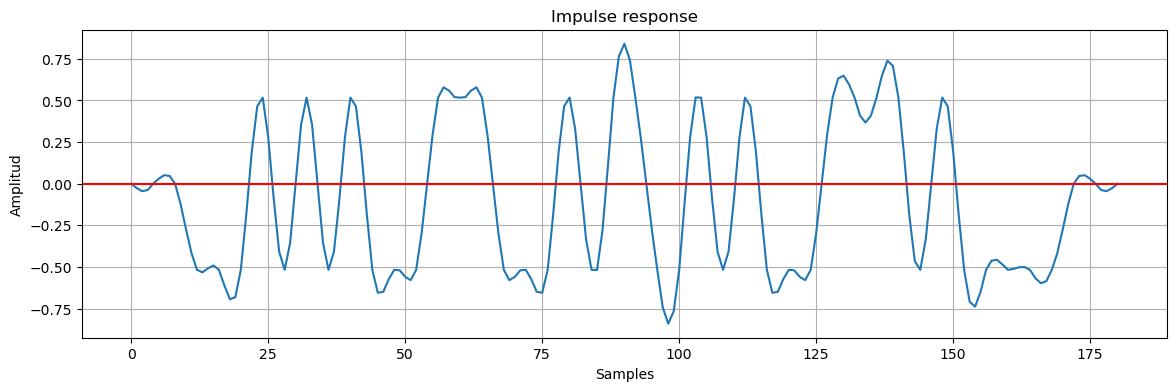

In [135]:
# UP converter with SRRC filter
signal =  upfirdn(h, d_tx, up=sps)

# Plot the signal after UP-CONVERTE
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
plt.plot(signal)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()

In [136]:
# Add noise to the signal
target_snr_db = 5

# Generate noise
signal_avg_watts = abs(np.mean(signal))
signal_avg_db = 10 * np.log10(signal_avg_watts)
noise_avg_db = signal_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal))

# Signal + Noise
signal_noise = signal + noise_volts

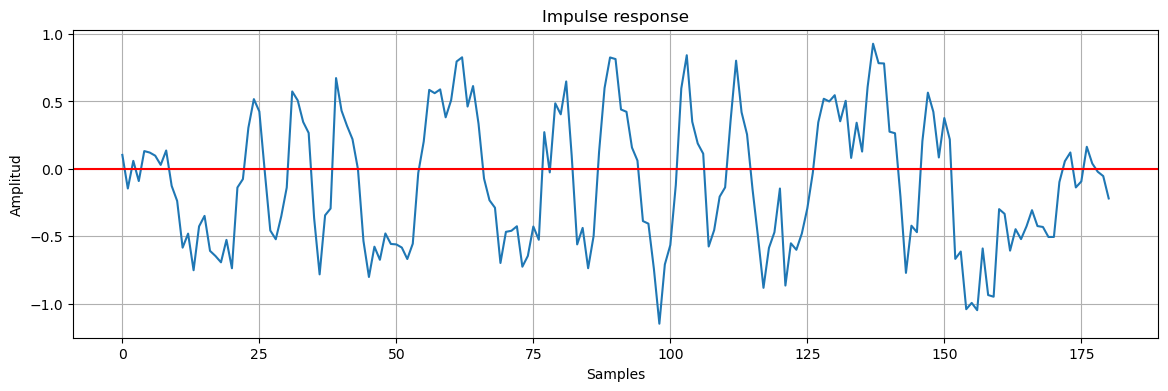

In [137]:
#Plot Signal + Noise
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
plt.plot(signal_noise)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()

In [138]:
# DOWN convert with SRRC filter
p1 = int(span)
p2 = int(span+num_d)
d_rx = upfirdn(h, signal_noise, down=sps)[p1:p2]

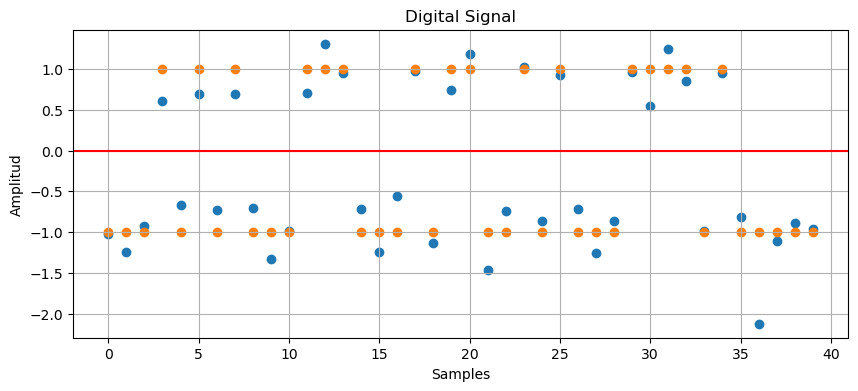

In [139]:
# Plot the BPSK send and the BPSK received
num_dx= len(d_rx)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(4)
plt.title('Digital Signal')
x = np.linspace(0, num_dx-1, num_dx)
plt.scatter(x, d_rx)
plt.scatter(x, d_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()

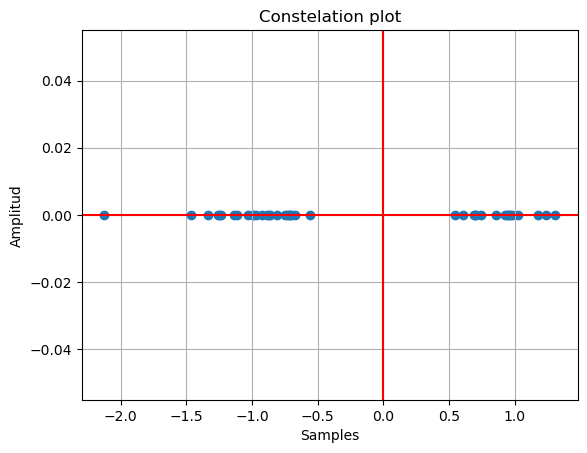

In [140]:
# Plot BPSK constelation
d_rx_const = d_rx + 1j * 0 
fig = plt.figure()
plt.title('Constelation plot')
plt.scatter(np.real(d_rx_const),np.imag(d_rx_const))
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # x = 0
plt.show()